## ML Final Project

**Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank 
- Prod Number: Number of products customer has with bank 
- HasCrCard: Does customer have credit card
- ActMem: Is customer active member 
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)

### Introduction 
Handling customer attrition or churn in banking sector is important, based on the “Churn Modeling” data provided by a multinational bank, the approach is applying Machine Learning with aim to find out reasons of customer churn and to predict customer churn for the bank in their Europe market. 

In [1]:
# Import Libreries

## For Data wrangling 
import pandas as pd
import numpy as np

## For Visualization Plot
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Import "Churn_Modelling.csv" files as a Dataframe "df_churn" and view with ".head()".

In [2]:
df_churn = pd.read_csv('Churn_Modelling.csv')
df_churn.head()   

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### From the data file, it consists of 12 features and 10000 customers information and will be use as input and target,

1) CustomerID: irrelevant data <br>
2) CredRate: to be use as Input <br>
3) Geography: to be use as Input <br>
4) Gender: to be use as Input <br>
5) Age: to be use as Input <br>
6) Balance: to be use as Input <br>
7) Tenure: to be use as Input <br>
8) Prod Number: to be use as Input <br>
9) HasCrCard: to be use as Input <br>
10) ActMem: to be use as Input <br>
11) Estimated salary: to be use as Input <br>
12) Exited: used as OUTPUT, the prediction target. Data with “1” represent customer has left the bank and “0” for customer still with the bank. <br>


Prediction data that required to feed into model must be focusing on cluster instead of individuals, we can segment data based on customer credit score and other behaviours but not individual ID. Hence, “CustomerID” is irrelevant data and “Exited” is the output or prediction Target with “1” represent customer has left the bank and “0” is customer still with the bank. The rest of 10 features will be used as Input for prediction. <br> 

* Next, the details o f Dataframe can be view with ".info()", it having 3 features with missing data (Gender, Age, EstimatedSalary) and 2 columns are "object" type or categorical data (Geography, Gender) that need to be handle before prediction, as Missing values and categorical data will affect the analysis process. The rest of the Features are all numeric data.

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


### Using ".nunique" to check and count on the data, it consists:
* 4 categorical data = 1) Geography, 2) Gender, 3) HasCrCard, 4) ActMem
* 6 continuous data = 1) CredRate, 2) Age, 3) Tenure, 4) Balance, 5) Prod Number, 6) EstimatedSalary

In [4]:
df_churn.nunique()

CustomerId         10000
CredRate             460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
Prod Number            4
HasCrCard              2
ActMem                 2
EstimatedSalary     9995
Exited                 2
dtype: int64

### 2) Data understanding / Preprocessing

Start with understanding current situation based on “Exited” customer or churned data by plotting a Pie-chart to visualize with percentage. 

* Observation:<br>
A total of 20% of the customer have churned, with such, we can set the baseline model (what is this model…?) that can be predicted in 20%. This percentage might be small, but it all depend on model that we choose and the prediction is having great accuracy of this 20%. This is the main focus of the bank to understand the reason behind churn and helps in predicting churn for customer that currently retained. 


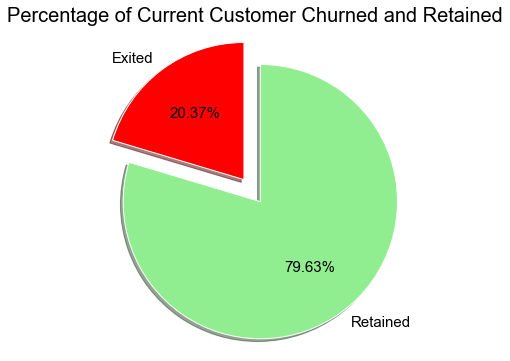

In [82]:
import matplotlib

matplotlib.rcParams['text.color'] = 'black'
data_c = [df_churn.Exited[df_churn['Exited']==1].count(), 
         df_churn.Exited[df_churn['Exited']==0].count()]

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data_c, labels = ['Exited', 'Retained'], colors = ["red", "lightgreen"],  
       autopct='%1.2f%%', shadow=True, explode = (0, 0.2), startangle=90)

matplotlib.rcParams['font.size']= 15
ax.axis('equal')
plt.title("Percentage of Current Customer Churned and Retained", size=20)
plt.show()




### Next, look into relations of "Exited" to the categorical data and visualized.

We notice the following:<br>
1) Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients. <br>
2) The proportion of female customers churning is also greater than that of male customers.<br>
3) Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. <br>
4) Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

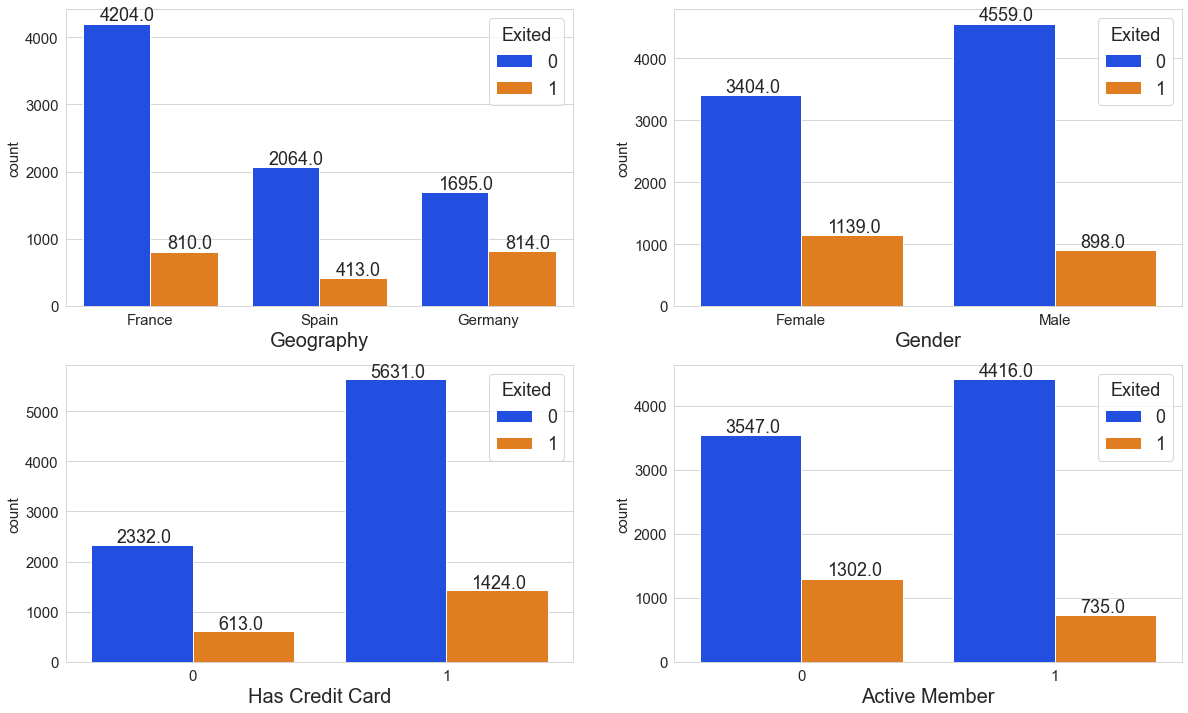

In [83]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.set_style('whitegrid')
matplotlib.rcParams['font.size']=18

ax1 = sns.countplot(x='Geography', hue = 'Exited',data = df_churn, ax=axarr[0][0], palette='bright')
ax1.set_xlabel("Geography",fontsize=20)
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
ax2 = sns.countplot(x='Gender', hue = 'Exited',data = df_churn, ax=axarr[0][1], palette='bright')
ax2.set_xlabel("Gender",fontsize=20)
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
ax3 = sns.countplot(x='HasCrCard', hue = 'Exited',data = df_churn, ax=axarr[1][0], palette='bright')
ax3.set_xlabel("Has Credit Card",fontsize=20)
for p in ax3.patches:
        ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
ax4 = sns.countplot(x='ActMem', hue = 'Exited',data = df_churn, ax=axarr[1][1], palette='bright')
ax4.set_xlabel("Active Member",fontsize=20)
for p in ax4.patches:
        ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

### Relations of "Exited" to the continuous data:

Next, the illustration on continuous data attributes with Box-plot.<br> 
1) Not much different on churned and retained customer based on Credit Score (CredRate). <br>
2) Where customer who Age older are likely to be churn compare to those younger, possible reason could be different preference or need with different age group. The bank may require to look into their marketing strategy based on different age groups. <br>
3) Despite the customer who spent extremely more or little time with the bank, they are likely to churn compare to those who are spending average time. <br>
4) Looking at Balance, it is not a good sign that churned customer are likely those have balanced, this might result in drain out available loan funds for the bank. <br>
5) Lastly, no significant sign of churn for Product Number and Estimated Salary.


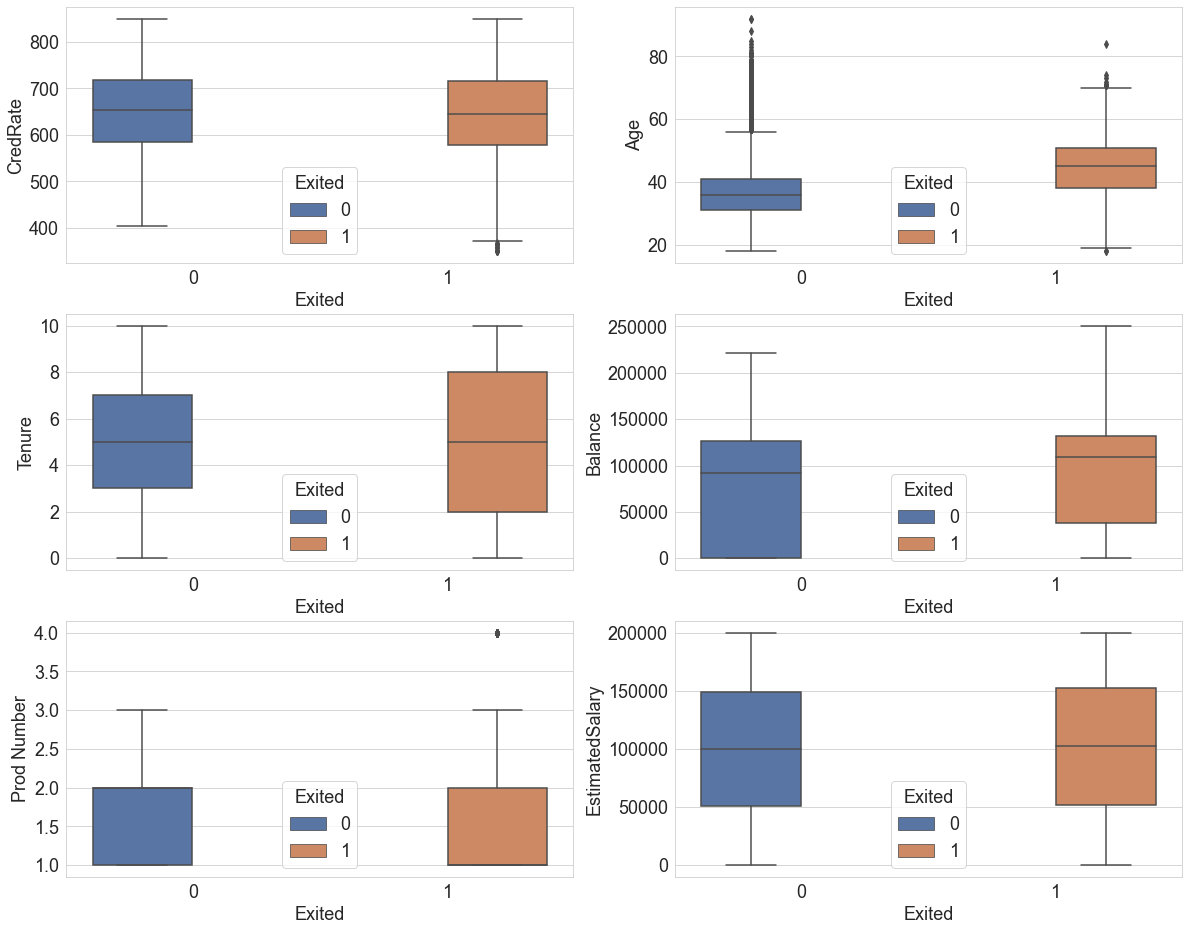

In [84]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 16))

sns.boxplot(y='CredRate', x ='Exited', hue ='Exited', data=df_churn, ax=axarr[0][0], palette='deep')
sns.boxplot(y='Age', x='Exited', hue='Exited',data=df_churn, ax=axarr[0][1], palette='deep')
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df_churn, ax=axarr[1][0], palette='deep')
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df_churn, ax=axarr[1][1], palette='deep')
sns.boxplot(y='Prod Number', x='Exited', hue='Exited', data=df_churn, ax=axarr[2][0], palette='deep')
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df_churn, 
            ax=axarr[2][1], palette='deep')
plt.show()


### Data pre-processing and Features Engineering 
Is on handle missing data and converting data into numeric representative that ease the understanding for algorithms. We will first drop the irrelevant data of "CustomerId" column. <br>

* Since dropping data could have result in missing information, the missing values for Age and EstimatedSalary columns with handled with “Impute” method by their Mean values. Lastly replace the missing Gender with Frequency or Mode.<br>

* From the dtype of data, columns CredRate, Age, Balance, EstimatedSalary are numeric “Values data” that can be use directly. <br>

* Where columns Gender, HasCrCard, ActMem, Exited are kind of “Binarization data”, except Gender columns all are in “1” or “0” which also can be use directly. We will handle the Gender columns with using One-Hot-Encoding. <br>

* Where columns Geography, Tenure, Prod Number are “Counts data”, and only Geography columns need to be handled by using One-Hot Encoding as well.


### Data preprocessing: Drop irrelevant data of CustomerId column.

In [8]:
df_churn = df_churn.drop(["CustomerId"], axis = 1)

### Viewing data with ".head(15)", row index 6 having missing Gender (NaN) and row index 10 to 12 with missing Age (NaN).

In [9]:
df_churn.head(15)

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,822,France,NaN,50.0,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27.0,2,134603.88,1,1,1,71725.73,0


### Data preprocessing: Handling Missing Values on Age and EstimatedSalary - replace by Mean.

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df_churn[['Age', 'EstimatedSalary']]) 
df_churn[['Age', 'EstimatedSalary']] = imputer.transform(df_churn[['Age', 'EstimatedSalary']])   


### Data preprocessing: Handling missing data for Gender column
Replace by Frequency (Mode), perform a count to check on highest frequency, Male have higher frequency (20% more).<br>

* Fill the missing "Gender" with "Male" and check the dataset.

In [11]:
df_churn.Gender.value_counts()    # 5453 - 4543 = 910 / 4543 = 0.2003 = 20% (male 20% higher)

Male      5453
Female    4543
Name: Gender, dtype: int64

In [12]:
df_churn['Gender'].replace(np.nan, "Male", inplace=True) 

In [13]:
df_churn.info()            # No more missing data in the Dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CredRate         10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   Prod Number      10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   ActMem           10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [14]:
df_churn.head(15)         # Check on row index 6 and 10 to 12.

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,619,France,Female,42.000000,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.000000,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.000000,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.000000,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.000000,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44.000000,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50.000000,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29.000000,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44.000000,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27.000000,2,134603.88,1,1,1,71725.73,0


### Visualize missing data with Heatmap 
No missing data as only one colour in the chart.

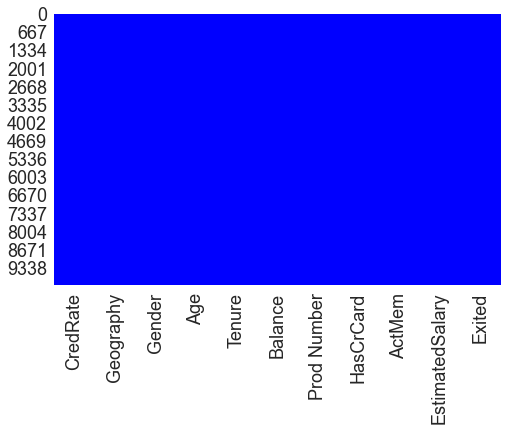

In [85]:
figure = plt.figure(figsize=(8,5))
sns.heatmap(df_churn.isnull(), cbar=False, linewidths=None, linecolor='blue');

### Basic Statistic Check
Running .describe() to check for Basic Statistic.

In [16]:
df_churn.describe()    

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,96.653299,10.486101,2.892174,62397.405202,0.581654,0.45584,0.499797,57504.269099,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100134.325000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149382.097500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data preprocessing: Categorical data type
Handle the "Object" type of Geography and Gender columns with One Hot Encoding.

In [17]:
train_df = pd.get_dummies(df_churn, drop_first = True)

In [18]:
train_df.head()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0


### Data preprocessing: Splitting the data into Features and Target.

In [19]:
features = train_df.drop(['Exited'], axis=1)

In [20]:
features

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,0,0,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42.0,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39.0,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35.0,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36.0,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42.0,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
target = train_df.Exited

In [22]:
target.value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

### 3) Machine learning model training:

Prediction on customer churn is a Classification problem under Supervised Learning, is either the customer stays or leaves. The algorithms that choose to be use are the most common and recognized in handling this problem, Logistics Regression, Decision Tree and Random Forest. 

**1) Logistic Regression** is a model that will try to predict or guess the probability of belonging, with occurrence of sample belong to either zero or one, or in this case group churn or not churn.

Before starting the Logistics Regression, we need to check on Multicolinearity issues as Logistics Regression will required little or no correlated between the independent variables (features = X). 


**2) Decision Trees** is used for classification purpose and is a recognized method for predicting customer churn problems. In term of decision making it help to visually and explicitly represent decisions and decision making. Hence the result of this model can help in fund allocation to target those potential churners.


**3) Random Forest** is capable of handling large data with higher dimensionality, and also reason for selecting is because unlike Logistics Regression, it is better at fitting non-linear data and even features with correlation.


### 3-1) Logistics Regression: Correlation Check on Multicolinearity between the independent variables (X).

From the result, features are not correlated to each. Highest is 0.4 (Geography_Germany & Balance).

In [23]:
multicolinearity_check = train_df.corr()
multicolinearity_check

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CredRate,1.000000,-0.004211,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001352,-0.027094,0.005538,0.004780,-0.002857
Age,-0.004211,1.000000,-0.009939,0.028080,-0.030564,-0.011756,0.085276,-0.007247,0.285203,0.046668,-0.001414,-0.027342
Tenure,0.000842,-0.009939,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007407,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028080,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.013129,0.118533,0.401110,-0.134892,0.012087
Prod Number,0.012238,-0.030564,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014132,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011756,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009935,-0.007138,0.010577,-0.013480,0.005766
ActMem,0.025651,0.085276,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011471,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001352,-0.007247,0.007407,0.013129,0.014132,-0.009935,-0.011471,1.000000,0.012234,0.010454,-0.006328,-0.008158
Exited,-0.027094,0.285203,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012234,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046668,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010454,0.173488,1.000000,-0.332084,-0.024628


### Visualize the Multicolinearity with Heatmap.

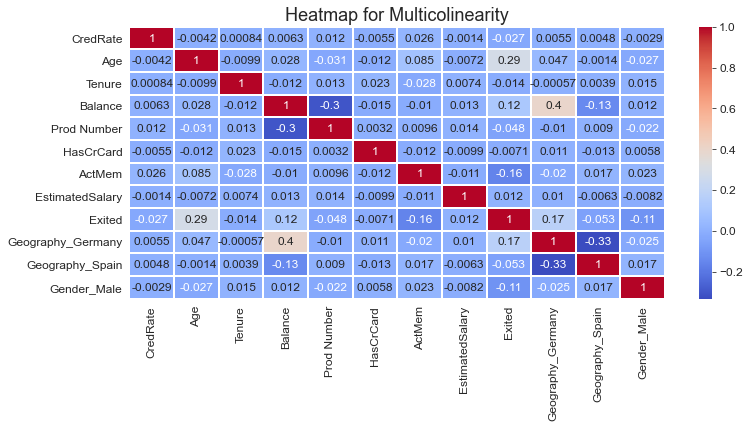

In [86]:
matplotlib.rcParams['font.size']=12
figure = plt.figure(figsize=(12,5))
plt.title('Heatmap for Multicolinearity',  size=18)
sns.heatmap(multicolinearity_check, annot=True, cmap='coolwarm', linecolor='white', linewidths=1);

### Perform Train-Test-Split: 
Splitting the dataset into the Training set and Test set, where test size in 20%.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.2, random_state = 111)

### Perform Feature Scaling: Applying StandardScaler.

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Logistic Regression to the Training set
Hyperparameters for the model by default threshold is 0.5.

In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()  
classifier.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Comparision of Actual and Predicted label/dependent variable 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
207,0,0
1866,0,1
9487,0,0
3673,0,0
7178,0,0


In [30]:
y_pred.shape   # 20%

(2000,)

### Describe the evaluation metrics used to evaluate the model.

The evaluation metrics that used are “Confusion Metrix” table which summarized the number of correctly classified and incorrectly classified (misclassified), “Precision” is the ratio of correctly predicted positive over total positive, “Recall” is the ratio of correctly predicted positive over all the observations in actual class and the “Accuracy” of the prediction. 

### 3-1) Logistic Regression: Checking the result with Confusion Matrix

**Result for Logistic Regression**<br>

From Confusion Matrix a total of 1531 were correctly predicted and 318 was incorrect. From the Classification Report, result on applying Logistics Regression is quite good, Accuracy score is 81%, %, the performance metrics in predicting customer who not churn is quite good, as the precision, recall and F1 score is 0.83, 0.96, and 0.89. However, the prediction of customer will churn (class 1) is less accurate with 0.60, 0.22 and 0.32.

[[1537   55]
 [ 321   87]]


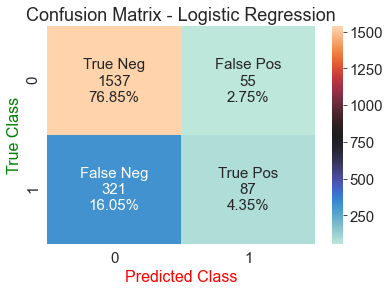

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm= confusion_matrix(y_test, y_pred)      # Computing the Confusion Matirx.
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='icefire')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Logistic Regression', size=18);


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1592
           1       0.61      0.21      0.32       408

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



### 3-1) Logistic Regression: AUC score
Another important Metrix is AUC score, it is the area under the receiver operating characteristic (ROC) curve. It indicating the capability of models in differentia the customer churn or not churn with range 0 to 1. Current AUC score for the model is 0.59 which is moderate.

In [33]:
from sklearn.metrics import roc_auc_score
LG_area_under_curve = roc_auc_score(y_test, classifier.predict(X_test))
print(LG_area_under_curve)


0.5893437777120898


In [34]:
classifier.predict_proba(X_test).shape

(2000, 2)

### Visualize the AUC result with ROC curve plot.

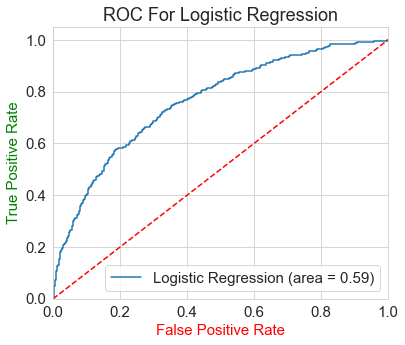

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])  

matplotlib.rcParams['font.size']=15
figure = plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % LG_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', color='red')
plt.ylabel('True Positive Rate', color='green')
plt.title('ROC For Logistic Regression')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### 3-2) Decision Tree: Fitting Decision Tree Classification to the Training set

Selecting the hyperparameters for the models:<br>
a) Set criterion as entropy for information gain and maximize the mutual information.<br>
b) Set the max_depth as 4 to have good predicting result of True Positive (1573) and False Positive (288) in Confusion Matrix.<br>
c) Set the random_state and any number (in this case 111) to have result not changing on each run.

In [36]:
from sklearn.tree import DecisionTreeClassifier 

DTclassifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=111) 
DTclassifier.fit(X_train, y_train)  

# Result on Confusion Matrix
# [[1497   95]   using 5 max-depth
#  [ 198  210]]

# [[1573   19]   using 4
#  [ 288  120]]

# [[1573   19]   using 3
#  [ 294  114]]

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=111)

In [37]:
# Predicting the Test set results

DT_y_pred = DTclassifier.predict(X_test)

### 2) Decision Tree: Checking the result with Confusion Matrix

**Result for Decision Tree**<br>

Based on Confusion Matrix, Decision Tree has predicted a total of 1576 True Positive correctly and 292 False Positive incorrect. From the Classification Report, result on applying Decision Tree is even better, Accuracy score is 85%, the performance metrics in predicting customer who not churn is also better, Precision, Recall and F1 score is 0.85, 0.99, and 0.91. The prediction of customer will churn (class 1) is improve with Precision of 0.86 but still less accurate on Recall and F1-score, 0.29 and 0.44. The overall result is better compared to Logistic Regression.

[[1576   16]
 [ 292  116]]


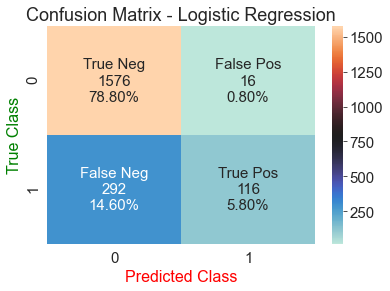

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test, DT_y_pred)      # Computing the Confusion Matirx.
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='icefire')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Logistic Regression', size=18);


In [39]:
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1592
           1       0.88      0.28      0.43       408

    accuracy                           0.85      2000
   macro avg       0.86      0.64      0.67      2000
weighted avg       0.85      0.85      0.81      2000



In [40]:
df_churn.Exited.value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

### 3-2) Decision Tree: AUC score result

Computing the AUC score for Decision Tree and plotting the ROC curve, the result for Decision Tree is 0.64 and is above moderate. And is 8.5% better than Logistic Regression Model. 

In [41]:
from sklearn.metrics import roc_auc_score
DT_area_under_curve = roc_auc_score(y_test, DTclassifier.predict(X_test))
print(DT_area_under_curve)


0.6371317371169573


In [42]:
DTclassifier.predict_proba(X_test).shape

(2000, 2)

### Visualize the AUC result with ROC curve plot.

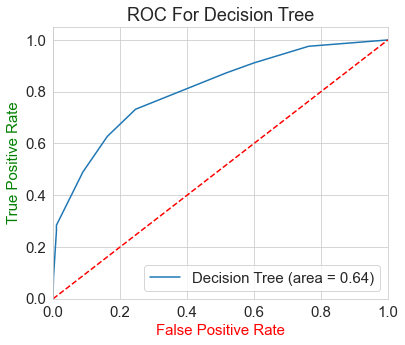

In [43]:


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, DTclassifier.predict_proba(X_test)[:,1])  

matplotlib.rcParams['font.size']=15
figure = plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % DT_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate',color='red')
plt.ylabel('True Positive Rate',color='green')
plt.title('ROC For Decision Tree')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### 3-3) Random Forest: Fitting Random Forest Classification to the Training set.

Selecting the hyperparameters for the models
a) Starting with n_extimators as 100 trees in the forest to have less incorrect of False Positive (227 / 213).
b) Set criterion as entropy for information gain and maximize the mutual information.
c) Set the random_state and any number (in this case 111) to have result not changing on each run.

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 111) 
RF.fit(X_train, y_train)

# Result on Confusion Matrix
# [[1543   49]   n_estimators=10
#  [ 227  181]]

# [[1534   58]   n_estimators=100
#  [ 213  195]]

RandomForestClassifier(criterion='entropy', random_state=111)

In [45]:
# Predicting the Test set results
RF_y_pred = RF.predict(X_test)

### 3-3) Random Forest: Making the Confusion Matrix

**Result for Random Forest**<br>

Based on Confusion Matrix, Random Forest has predicted a total of 1534 True Positive correctly and 213 False Positive incorrect. From the Classification Report, result on applying Random Forest having best result among the 3 model, Accuracy score is 86%, the performance metrics in predicting customer who not churn is also better, Precision, Recall and F1 score is 0.88, 0.96, and 0.92. The prediction of customer will churn (class 1) is quite balance with Precision 0.77, and the Recall and F1-score is the best compare to the other two models with value 0.48 and 0.59.

[[1535   57]
 [ 214  194]]


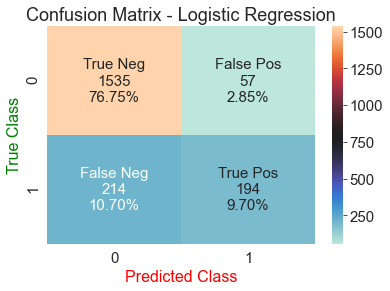

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test, RF_y_pred)      # Computing the Confusion Matirx.
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='icefire')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Logistic Regression', size=18);


# Setting n_estimators
# [[1543   49]   n_estimators=10
#  [ 227  181]]

# [[1534   58]   n_estimators=100
#  [ 213  195]]

In [47]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.77      0.48      0.59       408

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



### 3-3) Random Forest: AUC score result

Computing the AUC score for Random Forest and plotting the ROC curve, the result for Random Forest is 0.72 and is good. And is 12.5% better than Decision Tree model. Since Random Forest is formed by using many Decision Tree, hence the result is better.

In [48]:
from sklearn.metrics import roc_auc_score   #RF.predict(X_test)
RF_area_under_curve = roc_auc_score(y_test, RF.predict(X_test))
print(RF_area_under_curve)


0.7198430879889645


In [49]:
RF.predict_proba(X_test).shape

(2000, 2)

### Visualize the AUC result with ROC curve plot.

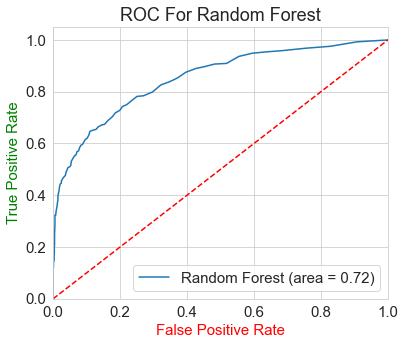

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])  

matplotlib.rcParams['font.size']=15
figure = plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % RF_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate',color='r')
plt.ylabel('True Positive Rate',color='g')
plt.title('ROC For Random Forest')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Handling Class imbalance
Since the dataset is imbalanced (80% - 20%), we will apply the SMOTE technique (Synthetic Minority Oversampling Technique) to handle this issue. With random of parameter given in the dictionary, it allow model to choose the best set of parameters and perform prediction with the best parameter set again.
This will help to further enhance the prediction result with Random Forest.

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV        
base_rf = RandomForestClassifier(random_state = 888)    # import the base of Random Forest model.

In [52]:
param_dict1 = {'max_depth' : [3, 7, 10] ,            #3,7,10 / 5,6,7,9,10
               'criterion': ['gini','entropy'],
               'n_estimators': [100, 200] }          #100, 200 / 10/50/100

In [53]:
param_dict1

{'max_depth': [3, 7, 10],
 'criterion': ['gini', 'entropy'],
 'n_estimators': [100, 200]}

In [54]:
grid_model = GridSearchCV(estimator= base_rf, param_grid = param_dict1 , cv=5 , verbose= 2) 

In [55]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=200, total=   0.6s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=200, total=   0.6s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .... criterion=gini, max_depth=3, n_estimators=200, total=   0.6s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV] .

[CV]  criterion=entropy, max_depth=10, n_estimators=200, total=   1.3s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   40.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=888),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 10], 'n_estimators': [100, 200]},
             verbose=2)

In [56]:
grid_model.best_params_     

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

### Building the Random Forest model based on best parameter from Grid Search
From the Grid Search result with the best parameter, fit the setting to Create Best Random Forest parameters and perform predict again.

In [57]:
best_RF = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 888)
best_RF

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=888)

In [58]:
model_rf = best_RF.fit(X_train, y_train)
result_rf = model_rf.predict(X_test)

[[1545   47]
 [ 229  179]]


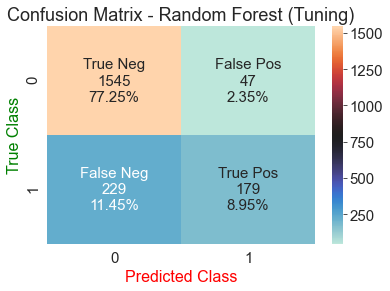

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test, result_rf)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='icefire')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Random Forest (Tuning)', size=18);


In [60]:
print(classification_report(y_test , result_rf))       # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.79      0.44      0.56       408

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [61]:
# AUC-score for best Random Forest
roc_auc_score(y_test, result_rf)


0.7046014385653758

## Feature Importance with Random Forest
With the Moderate result after applying SMOTE technique, next to perform "Features Importance" to identify which features contributes or decreasing the weighted impurity. Apply to Random Forest is to averaging the decrease in impurity among the trees.

In [62]:
len(model_rf.feature_importances_)           # check for the features

11

In [63]:
model_rf.feature_importances_ 

array([0.08146027, 0.31671198, 0.04314294, 0.10743862, 0.22236845,
       0.01055289, 0.06686707, 0.08135685, 0.04283785, 0.00820168,
       0.0190614 ])

In [64]:
columns = features.columns 
columns

Index(['CredRate', 'Age', 'Tenure', 'Balance', 'Prod Number', 'HasCrCard',
       'ActMem', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

[0.08146027 0.31671198 0.04314294 0.10743862 0.22236845 0.01055289
 0.06686707 0.08135685 0.04283785 0.00820168 0.0190614 ]


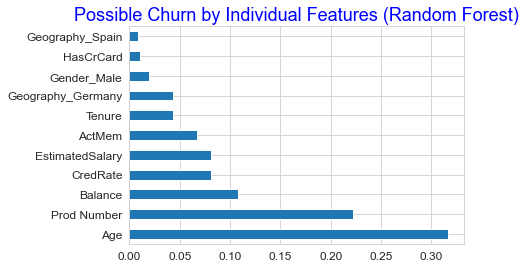

In [87]:
feat_importances = pd.Series(model_rf.feature_importances_, index=columns)  # to include title....
print(model_rf.feature_importances_)
feat_importances.nlargest(11).plot(kind='barh')
plt.title('Possible Churn by Individual Features (Random Forest)', 
          size=18, color='blue');

### Perform Random Forest Prediction with Importance Features (High score)
From the Feature Importance result, select only the 2 features with high score for prediction. Assigning the Features2 and Target2 accordingly.

In [66]:
features2 = train_df[['Age','Prod Number']]   
features2.head()

,Age,Prod Number
0,42.0,1
1,41.0,1
2,42.0,3
3,39.0,2
4,43.0,1


In [67]:
target2 = train_df.Exited 
target2.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Perform Train-Test-Split and Fitting the Model
Perform train-test-split on the Features2 and Target2, create "Important Random Forest" with assigning the best parameter.

In [68]:
from sklearn.model_selection import train_test_split    
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, 
                                                    test_size = 0.2, random_state = 111)

In [69]:
from sklearn.preprocessing import StandardScaler     

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)   

In [70]:
Im_RF = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 888)
Im_RF

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=888)

In [71]:
Im_model_rf = Im_RF.fit(X_train2, y_train2)
Im_result_rf = Im_model_rf.predict(X_test2)

[[1502   90]
 [ 232  176]]


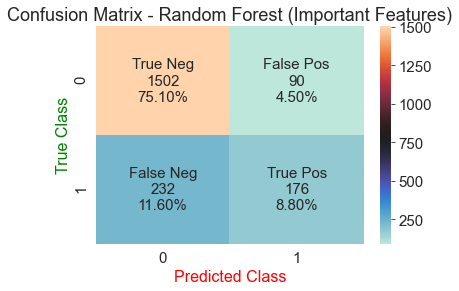

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
figure = plt.figure(figsize=(6,4))
matplotlib.rcParams['font.size']=15

cm = confusion_matrix(y_test2, Im_result_rf)
print(cm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='icefire')

plt.xlabel('Predicted Class', fontsize=16, color='r') 
plt.ylabel('True Class', fontsize=16, color='g')
plt.title('Confusion Matrix - Random Forest (Important Features)', size=18);


In [73]:
print(classification_report(y_test2, Im_result_rf))     # Generate Classification Report.

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1592
           1       0.66      0.43      0.52       408

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.71      2000
weighted avg       0.82      0.84      0.83      2000



In [74]:
# AUC-score for Importnat Random Forest
roc_auc_score(y_test2, Im_result_rf)
# 0.6674545704633452

0.6874199428515124

### Learning:
Based on the normal process of applying Random Forest Model, result on applying "Best Parameter" and "Features Importance" should give a better prediction result. However it is not in this case study. Reason could be due to the imbalanced and limitation on the dataset itself. 


### Conclusion:

The result from each model clearly indicated that the prediction is worked and able to provide some insight for stakeholders. With the Accuracy from Logistic Regression at 81%, it increases to 85% with applying Decision Tree and lastly 86% with Random Forest. Since the model has reached an accuracy of 86%, this mean it can predict 8.6 out of 10 times correct be it a customer is likely to churn or not. 

This project provides me a new learning experience in term of predicting customer churn, it also allowed me to work in different type of plotting and make me realized that the important of Data Visualization can help in better understanding the results. Moving forward I would like to practice and explored more on the Machine Learning especially prediction on real live or work-related issues.
